In [1]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

* MedInc (Ingreso Mediano): Mediana del ingreso para los hogares en un bloque.
* HouseAge (Edad de la Casa): Mediana de la edad de las casas en un bloque.
* AveRooms (Promedio de Habitaciones): Promedio de habitaciones por hogar.
* AveBedrms (Promedio de Dormitorios): Promedio de dormitorios por hogar.
* Population (Población): Población en un bloque.
* AveOccup (Promedio de Ocupación): Promedio de ocupantes por hogar.
* Latitude (Latitud): Latitud de la ubicación del bloque.
* Longitude (Longitud): Longitud de la ubicación del bloque.
* La variable objetivo (etiqueta) es MedHouseVal (Valor Mediano de las Casas): Valor medio de las viviendas en unidades de $100,000 para los bloques de viviendas.

In [2]:
# Cargar el conjunto de datos
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Crear un DataFrame de pandas
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Añadir la columna target a DataFrame
df['MedHouseVal'] = california_housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Dividir el DataFrame en características (X) y variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Dividir el DataFrame en características (X) y variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [5]:
# Dividir los datos en entrenamiento y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir los datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

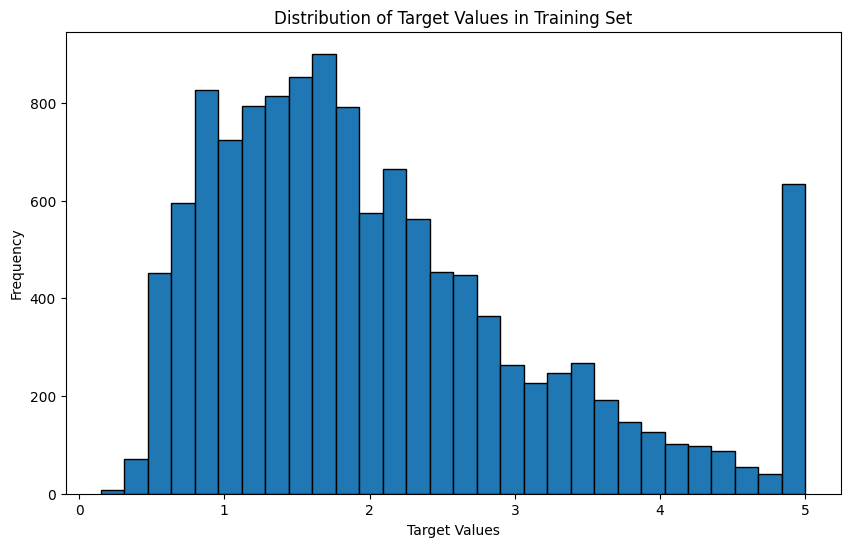

In [6]:
# Visualizar la distribución de los valores objetivo en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, edgecolor='black')
plt.title('Distribution of Target Values in Training Set')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Inicializar y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Hacer predicciones en los datos de prueba
y_pred = linear_model.predict(X_test)

# Calcular el MSE para evaluar el rendimiento del modelo
linear_mse = mean_squared_error(y_test, y_pred)

# Imprimir el MSE
print("Mean Squared Error: ", linear_mse)

Mean Squared Error:  0.5617904958193354



# Ingeniería de Características: Agregar características polinómicas

In [19]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(df.drop('MedHouseVal', axis=1))

In [20]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, df['MedHouseVal'], test_size=0.2, random_state=42)


In [21]:
# Inicializar y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Hacer predicciones en los datos de prueba
y_pred = linear_model.predict(X_test)

# Calcular el MSE para evaluar el rendimiento del modelo
poly_mse = mean_squared_error(y_test, y_pred)

# Imprimir el MSE
print("Mean Squared Error: ", poly_mse)


Mean Squared Error:  0.46430152411887143


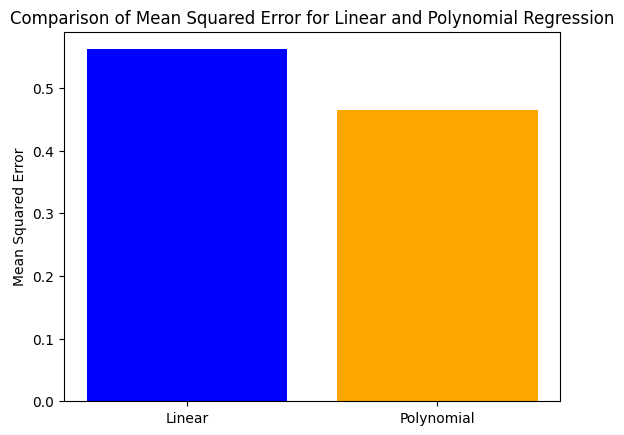

In [23]:
# Visualizar los resultados
plt.bar(['Linear', 'Polynomial'], [linear_mse, poly_mse], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Linear and Polynomial Regression')
plt.show()